# Eye-tracker với OpenCV

> - Người thực hiện: Thân Trọng Thành, Nguyễn Quốc Anh  
> - Người hướng dẫn: thầy Chu Minh Phương 
> - Project: [S1mple-eye-tracker](https://github.com/trongthanht3/s1mple-eye-tracker) 
> - Dẫn nguồn:  
  - [github](https://github.com/stepacool/Eye-Tracker)
  - [medium](https://medium.com/@stepanfilonov/tracking-your-eyes-with-python-3952e66194a6)

# I. Giới thiệu

- Ở người, hầu hết các loài thú có vú và chim, mống mắt (tiếng Anh: Iris, số nhiều: irides hoặc irises) là một cấu trúc mỏng, hình tròn nằm trong mắt, có công dụng điều chỉnh đường kính và kích cỡ của đồng tử, cũng chính là lượng ánh sáng đi đến võng mạc. Màu mắt được quyết định bởi màu của mống mắt. Đồng tử thường được coi là lỗ khẩu, còn mống mắt được coi là khẩu [ref](https://vi.wikipedia.org/wiki/M%E1%BB%91ng_m%E1%BA%AFt)


- Đặc tính:
    + Ổn định - mống mắt của con người được hình thành từ 10 tháng tuổi và không thay đổi trong suốt cuộc đời của mỗi người.

    + Không nhầm lẫn – xác xuất hai mống mắt giống nhau hoàn toàn là gần như không thể.




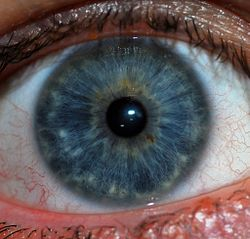
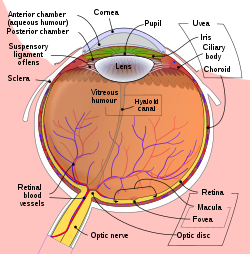

# II. Eye-tracker với OpenCV

- Mống mắt là một đặc trưng quan trọng của mỗi con người. 

- Mống mắt có thể được sử dụng vào rất nhiều mục đích, từ lĩnh vực tâm lý học, sức khoẻ,... cho tới công nghệ

- Một ứng dụng đã được sử dụng rộng rãi và phổ biến với mống mắt đó chính là bảo mật, với tính duy nhất, gần như không thể có 2 mống mắt giống nhau, việc sử dụng mống mắt làm một khoá sinh trắc học cùng các kĩ thuật khác là một cơ chế bảo mật hiệu quả và rất khó để làm giả (Iris Recognition). Một số ví dụ cho bảo mật bằng mống mắt là các cảm biến mống mắt trên các dòng điện thoại Samsung, iPhone

- Ngoài ra còn rất nhiều bài toán khác như phân tích tâm lý học dựa trên mống mắt hoặc nhận diện khuôn mặt dựa trên các đặc trưng mống mắt, khoảng cách mắt, và còn nhiều ứng dụng khác nữa

- Và nền tảng của những bài toán này vẫn cần phải xác định vị trí mống mắt, một bài toán cơ bản đó là Eye-tracker

## 1. Giới thiệu về OpenCV



- OpenCV (Open Computer Vision) là một thư viện mã nguồn mở hàng đầu cho xử lý về thị giác máy tính, machine learning, xử lý ảnh. OpenCV đươc viết bằng C/C++, vì vậy có tốc độ tính toán rất nhanh, có thể sử dụng với các ứng dụng liên quan đến thời gian thực. Opencv có các interface cho C/C++, Python Java vì vậy hỗ trợ được cho Window, Linux, MacOs lẫn Android, iOS OpenCV có cộng đồng hơn 47 nghìn người dùng và số lượng download vượt quá 6 triệu lần

## 2. Ý tưởng cho bài toán xác Eye-tracker bằng OpenCV

- Yêu cầu: xác định vị trí mống mắt trên khuôn mặt
- Phân tích, cần làm:
  + Bài toán eye-tracker cũng như nhiều bài toán object detection, chúng ta cần phải đi từ lớn tới nhỏ, tức là phát hiện những phần lớn, từ đó tách ra các phần nhỏ tiếp theo
  + Trong bài toán này, ta sẽ đi từ xác định khuôn mặt -> xác định mắt -> xác định mống mắt
  + Xác định vị trí khuôn mặt. 
    - Sử dụng modul có sẵn cung cấp bởi openCV là file haarcascade_frontalface_default.xml
  + Xác định vị trí mắt.  
    - Sử dụng modul có sẵn cung cấp bởi openCV là file haarcascade_eye.xml
  + Xác định vị trí mống mắt
    + Sử dụng blob detection để xác định vùng đen tròn lớn nhất tại khu vực mắt  
  + Từ những bước trên vẽ lại trên ảnh gốc

## 3. Simple Eye-tracker với OpenCV



### 1.   Detect khuôn mặt



In [58]:
#import thư viện
import cv2
import numpy
from google.colab.patches import cv2_imshow

#load modul detect khuôn mặt và mắt

#modul face detect
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#modul eye detect
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

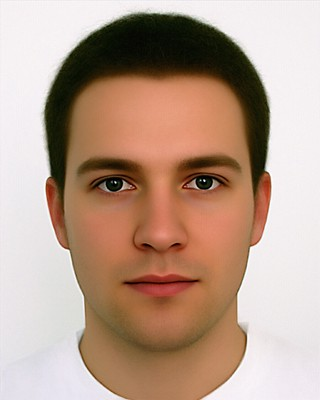

In [59]:
#đọc ảnh với openCV
img = cv2.imread('face.jpeg')
cv2_imshow(img)


- Trong object detection, chúng ta sẽ đi từ lớn đến nhỏ, có nghĩa là chúng ta sẽ bắt đầu với khuôn mặt, rồi tới mắt, và cuối cùng là mống mắt. Điều này sẽ tiết kiệm tài nguyên cho hệ thống, tăng tốc xử lý và giảm thiểu những trường hợp phát hiện sai

[[ 42  91 229 229]]


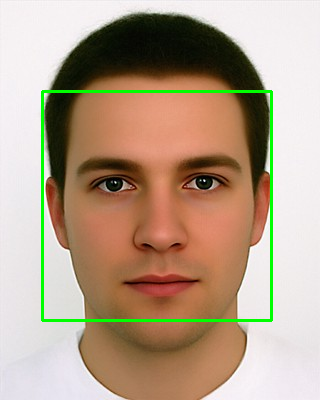

In [60]:
#chúng ta sẽ làm việc chủ yếu trên những gray frame
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#make picture gray

#modul face detect dưới đây sẽ trả về toạ độ của khuôn mặt dạng toạ độ đi kèm với độ lớn (x,y,w,h)
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
print(faces)

#rectangle face, chúng ta vẫn sẽ áp dụng rectangle trên ảnh gốc
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img)

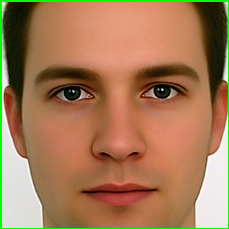

In [61]:
#cắt face frame dựa trên toạ độ từ faces ra để xử lý riêng
face_gray = img_gray[y:y+h, x:x+w] # cắt face gray từ ảnh gray ban đầu
face = img[y:y+h, x:x+w] # cắt face từ ảnh ban đầu

cv2_imshow(face)

### 2. Detect vùng mắt

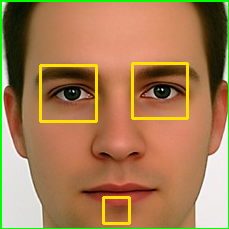

In [62]:
#detect mắt
eyes = eye_cascade.detectMultiScale(face_gray)
temp = face.copy()
#rectangle mắt từ toạ độ trong eyes
for (ex,ey,ew,eh) in eyes: 
    cv2.rectangle(temp,(ex,ey),(ex+ew,ey+eh),(0,225,255),2)

cv2_imshow(temp)

- Nhận thấy rằng ngay cả phần cằm cũng có thể bị detect nhầm thành mắt, ta cần có cách xử lý
- Biết rằng mắt người luôn nằm ở nửa trên của khuôn mặt, ta có thể dựa vào đó để chỉ chọn những toạ độ từ eyes có toạ độ ở phần nửa trên khuôn mặt

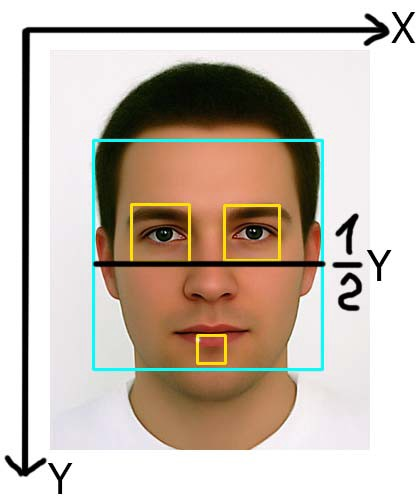

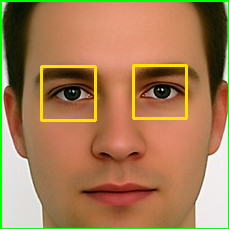

In [63]:
eyes = eye_cascade.detectMultiScale(face_gray,1.3,5)
height = face_gray.shape[0]

temp2 = face.copy()

for (ex,ey,ew,eh) in eyes:
    if ey+eh > height/2:      #ta chỉ chọn toạ đọ < height/2
        pass
    cv2.rectangle(temp2,(ex,ey),(ex+ew,ey+eh),(0,225,255),2)

cv2_imshow(temp2)

- Giờ chúng ta cần nhận tách ra mắt trái với mắt phải, với logic là mắt trái ở nửa mặt trái, mắt phải ở nửa mặt phải

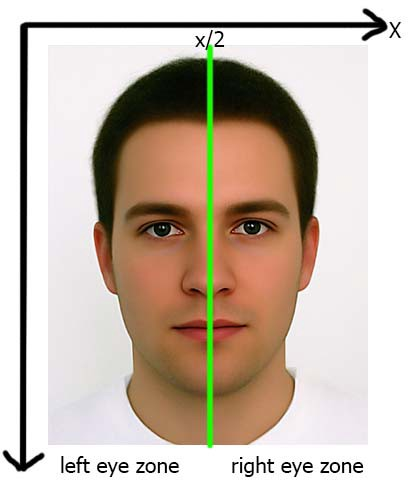

In [64]:
height = face_gray.shape[0]
width = face_gray.shape[1]

eye_left = None        #tránh lỗi khi trả về nếu không detect được mắt nào
eye_right = None       #

for (ex,ey,ew,eh) in eyes:
  if ey+eh > height/2:
      pass

  eye_center = ex + ew/2      #trung tâm vùng mắt
  if eye_center < width/2:
      eye_left = face[ey:ey+eh, ex:ex+ew]
      # cv2.imshow('left', eye_left)
  else:
      eye_right = face[ey:ey+eh, ex:ex+ew]
      # cv2.imshow('right', eye_right)

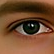

In [65]:
#mat trai
cv2_imshow(eye_left)

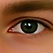

In [66]:
#mat phai
cv2_imshow(eye_right)

### 3. Detect mống mắt

- Ta sử dụng kĩ thuật blob detection để phát hiện mống mắt là vùng có vùng trùng màu có hình tròn


In [67]:
detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.filterByCircularity = False
detector_params.filterByConvexity = False
detector_params.filterByInertia = False
detector_params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(detector_params)

In [68]:
#thử với mắt trái
keypoints = detector.detect(eye_left)

eye_temp = eye_left.copy()
eye_temp = cv2.cvtColor(eye_temp, cv2.COLOR_BGR2GRAY)

eye_temp = cv2.drawKeypoints(eye_temp, keypoints, eye_temp, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

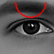

In [69]:
cv2_imshow(eye_temp)

- Kết quả chúng ta nhận được sau khi đưa ảnh vào là blob detection nhận diện lông mày, do lông mày cũng có một vùng đen lớn


- Nhận thấy vùng lông mày luôn ở khoảng 25-30% phần trên frame mắt mà ta nhận được, vậy ta sẽ loại bỏ 25% đầu tiên đi
- Đi kèm với đó, blob detection hoạt động tốt hơn trên ảnh nhị phân, nên chúng ta cũng sẽ đưa luôn frame mắt về dạng nhị phân

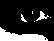

In [76]:
eye_temp = eye_left.copy()
eye_temp = cv2.cvtColor(eye_temp, cv2.COLOR_BGR2GRAY)
height, width = eye_left.shape[:2]
eyebrow_h = int(height * 0.25)
eye_temp = eye_temp[eyebrow_h:height, 0:width]  # loai bo long may


cv2.threshold(eye_temp, 127, 255, cv2.THRESH_BINARY, eye_temp)

cv2_imshow(eye_temp)

- Vùng đen của mống mắt vẫn chưa rõ ràng, ta cần điều chỉnh lại threshold một chút

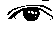

In [79]:
eye_temp = eye_left.copy()
eye_temp = cv2.cvtColor(eye_temp, cv2.COLOR_BGR2GRAY)
height, width = eye_left.shape[:2]
eyebrow_h = int(height * 0.25)
eye_temp = eye_temp[eyebrow_h:height, 0:width]  # loai bo long may


cv2.threshold(eye_temp, 42, 255, cv2.THRESH_BINARY, eye_temp)

cv2_imshow(eye_temp)

- Kết quả trên đã tốt hơn rất nhiều khi chỉ còn sót lại vùng mống mắt có blob lớn nhất và một đường mí mắt, đồng thời lông mày cũng đã được loại bỏ

- Việc còn lại chỉ là sử dụng blob detection để xác định mống mắt

In [80]:
keypoints = detector.detect(eye_temp)

eye_temp = cv2.drawKeypoints(eye_temp, keypoints, eye_temp, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

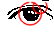

In [81]:
cv2_imshow(eye_temp)

- Bị dư một vùng blob, điều chỉnh thêm một chút ở phần threshold binary, việc điều chỉnh này phụ thuộc nhiều vào độ sáng của ảnh gốc sẽ ảnh hưởng đến vùng mống mắt

before:


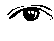

after erode:


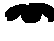

after dilate:


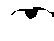

after blur:


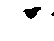

result:


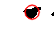

In [106]:
eye_temp = eye_left.copy()
eye_temp = cv2.cvtColor(eye_temp, cv2.COLOR_BGR2GRAY)
height, width = eye_left.shape[:2]
eyebrow_h = int(height * 0.25)
eye_temp = eye_temp[eyebrow_h:height, 0:width]  # loai bo long may


cv2.threshold(eye_temp, 35, 255, cv2.THRESH_BINARY, eye_temp)

#sử dụng erode và dilate và blur để loại bỏ đường mí mắt còn lại
print("before:")
cv2_imshow(eye_temp)
eye_temp = cv2.erode(eye_temp, None, iterations=2) #1
print("after erode:")
cv2_imshow(eye_temp)
eye_temp = cv2.dilate(eye_temp, None, iterations=4) #2
print("after dilate:")
cv2_imshow(eye_temp)
eye_temp = cv2.medianBlur(eye_temp, 5) #3
print("after blur:")
cv2_imshow(eye_temp)

keypoints = detector.detect(eye_temp)

eye_temp = cv2.drawKeypoints(eye_temp, keypoints, eye_temp, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print("result:")
cv2_imshow(eye_temp)

- Như vậy việc tìm mống mắt của ta đã xong, tổng hợp lại những bước trên, kết quả cuối cùng có thể nhận được:

result:


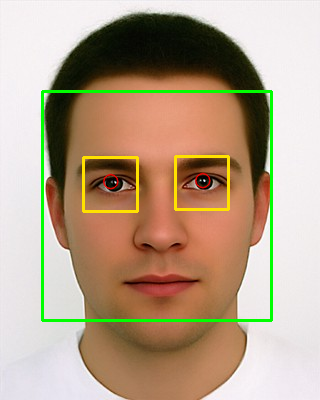

In [114]:
img = cv2.imread('face.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#make picture gray

#modul face detect 
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

face_gray = img_gray[y:y+h, x:x+w] # cắt face gray từ toạ độ
face = img[y:y+h, x:x+w] # cut the face frame out

#rectangle face
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

eyes = eye_cascade.detectMultiScale(face_gray,1.3,5)
height = face_gray.shape[0]

for (ex,ey,ew,eh) in eyes:
    if ey+eh > height/2:      #ta chỉ chọn toạ đọ < height/2
        pass
    cv2.rectangle(face,(ex,ey),(ex+ew,ey+eh),(0,225,255),2)

height = face_gray.shape[0]
width = face_gray.shape[1]

eye_left = None        #tránh lỗi khi trả về nếu không detect được mắt nào
eye_right = None       #

for (ex,ey,ew,eh) in eyes:
  if ey+eh > height/2:
      pass

  eye_center = ex + ew/2      #trung tâm vùng mắt
  if eye_center < width/2:
      eye_left = face[ey:ey+eh, ex:ex+ew]
      # cv2.imshow('left', eye_left)
  else:
      eye_right = face[ey:ey+eh, ex:ex+ew]

detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.filterByCircularity = False
detector_params.filterByConvexity = False
detector_params.filterByInertia = False
detector_params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(detector_params)

l_height, l_width = eye_left.shape[:2]
r_height, r_width = eye_right.shape[:2]
l_eyebrow_h = int(l_height * 0.25)
r_eyebrow_h = int(r_height * 0.25)

eye_left_cut = eye_left[eyebrow_h:height, 0:width]  # loai bo long may
eye_right_cut = eye_right[eyebrow_h:height, 0:width]  # loai bo long may

eye_left_cut_temp = cv2.cvtColor(eye_left_cut, cv2.COLOR_BGR2GRAY)
eye_right_cut_temp = cv2.cvtColor(eye_right_cut, cv2.COLOR_BGR2GRAY)


cv2.threshold(eye_left_cut_temp, 35, 255, cv2.THRESH_BINARY, eye_left_cut_temp)
cv2.threshold(eye_right_cut_temp, 35, 255, cv2.THRESH_BINARY, eye_right_cut_temp)

eye_left_cut_temp = cv2.erode(eye_left_cut_temp, None, iterations=2) #1
eye_left_cut_temp = cv2.dilate(eye_left_cut_temp, None, iterations=4) #2
eye_left_cut_temp = cv2.medianBlur(eye_left_cut_temp, 5) #3

eye_right_cut_temp = cv2.erode(eye_right_cut_temp, None, iterations=2) #1
eye_right_cut_temp = cv2.dilate(eye_right_cut_temp, None, iterations=4) #2
eye_right_cut_temp = cv2.medianBlur(eye_right_cut_temp, 5) #3

keypoints = detector.detect(eye_left_cut_temp)
keypoints = detector.detect(eye_right_cut_temp)

eye_left_cut_temp = cv2.drawKeypoints(eye_left_cut, keypoints, eye_left_cut, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
eye_right_cut_temp = cv2.drawKeypoints(eye_right_cut, keypoints, eye_right_cut, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print("result:")
cv2_imshow(img)



## 4. Viết chương trình Eye-tracker sử dụng camera

- Về cơ bản chúng ta chỉ tổng hợp lại các bước trên và chia ra thành các hàm riêng rẽ, sau đó thêm vào phần sử dụng camera để lấy các frame và đưa vào detect

- Chương trình đã được viết trong file main.py

## III. Kết luận

- Eye-tracker là bài toán nền tảng cho rất nhiều bài toán quan trọng khác: eye-tracking, iris detection, trong lĩnh vực y tế, công nghiệp,...
- Việc xác định vị trí mắt và mống mắt là bước cơ bản nhưng là bước đầu tiên trong các bài toán trên
- Rút ra từ project trên, ta có thể học được:  
  + Phát hiện mống mắt bằng OpenCV trên python
  + Cách sử dụng một số hàm cơ bản trong thư viện OpenCV và các modul có sẵn
  + Biết thêm về một vài công nghệ đằng sau các bài toán Iris Recognition, Face Recognition

* Lời kết: Xin cảm ơn thầy Phương đã cho lời khuyên và định hướng cho bài toán này, cảm ơn các thầy cô dạy Python Online ở AI Academy đã có những bài giảng tâm huyết và chất lượng.